In [1]:
if __name__ == "__main__":

    from methods import jacobi, sor, gauss_seidel


import numpy as np

import math

import matplotlib.pyplot as plt

import matplotlib.animation as animation

from scipy.sparse import diags

from scipy.sparse import csr_matrix


class SimulationGrid:


    def __init__(self, N, D = 1,):
        """

        Creates a simulation grid.

        Inputs:

            - N: How many intervals divide space

            - D: Parameter , default set to 1

            - object_: Matrix that specifies sink points. 0 means the state changes, 1 means it does not and it is fixde
        """


        self.N = N

        self.initialize()
        self.dla(int(self.N/2))
        self.data = [self.C] #For simulations


    def initialize(self):
        """
        Initializes matrix with all all 0 concentrations except 1 on first row
        object_ matrix specifies which points need to be updated
        """

        C = np.zeros((self.N+3, self.N+3))
        number = 23
        C[1,:] = 1
        
        C[0,:] = number
        C[-1,:] = number
        C[:,0] = number
        C[:,-1] = number

        self.C = C

        cluster = np.zeros((self.N+3, self.N+3))

        cluster[1,:] = 1
        cluster[-2,:] = 1

        cluster[0,:] = 23
        cluster[-1,:] = number
        cluster[:,0] = number
        cluster[:,-1] = number

        self.cluster = cluster
    
       
    
    def dla(self,position):
        """

        Creates a sink point for DLA.

        Inputs:

            - position: Tuple of two points
        """

        self.cluster[-2,position] = 2

    def sor(self,w,stop):
        """
        Performs Successive over relaxation.
        Inputs:
            - C: Matrix A with all values
            - w: weight
            - stop: simulation stopper
        """
        A = np.copy(self.C)
        n_count = 0
        non_cte = np.where(self.cluster == 0)

        while True:
            n_count += 1 
            A_b = np.copy(A)
            for i in np.unique(non_cte[0]):
                for j in non_cte[1][non_cte[0] == i]:
                    if j == 1:
                        A[i,1] = (w/4)*(A[i+1,1] + A[i-1,1] + A[i,2] + A[i,-3]) + (1-w)*A[i,1]

        
                    elif j == (A.shape[0]-2):
                        A[i,-2] = (w/4)*(A[i+1,-2] + A[i-1,-2] + A[i,2] + A[i,-3]) + (1-w)*A[i,-1]
                        
            
                    else:
                        A[i,j] = (w/4)*(A[i+1,j] + A[i-1,j] + A[i,j+1] + A[i,j-1])+ (1-w)*A[i,j]
            
            if n_count%1000 == 0:
                print(A)
    
            if np.allclose(A, A_b, atol=stop):
                self.C = np.copy(A)
                self.data += [np.copy(A)]
                break


    def growth_model(self,w,eta, stop = 0.0001):
        """

        Executes a time_step ing method given a function

        Inputs:

            - method_func: Method to use function

            - stop: Stopping criteria

            - store_step: Every how many steps store data
        """

        n_count = 0

        self.iterations = []
        for i in range(1):
            self.sor(w,stop)
            
            # Finding all the candidates
            sink = np.where(self.cluster == 2)
            candidate_0 = [] # ROW
            candidate_1 = [] # Column
            c_candidate = 0
            tag = np.zeros((self.N + 3, self.N + 3)) 

            for k in range(len(sink[0])):
                a = sink[0][k]
                b = sink[1][k]

                if a == 0 or a == self.N + 2 or b == 0 or b == self.N + 2:
                    continue
                else:
                    for i in [a - 1, a + 1]:
                        if self.cluster[i][b] == 0 and tag[i][b] == 0:
                            candidate_0.append(i)
                            candidate_1.append(b)
                            tag[i][b] = 1
                            c_candidate += self.C[candidate_0[-1]][candidate_1[-1]]
                    for j in [b - 1, b + 1]:
                        if self.cluster[a][j] == 0 and tag[a][j] == 0:
                            candidate_0.append(a)
                            candidate_1.append(j)
                            tag[a][j] = 1
                            c_candidate += self.C[candidate_0[-1]][candidate_1[-1]]

            # calculating the probability of becoming a sink for candidates
            for k in range(len(candidate_0)):
                if (self.C[candidate_0[k]][candidate_1[k]] ** eta) / c_candidate > np.random.uniform(0,1):
                    self.C[candidate_0[k]][candidate_1[k]] = 0
                    self.cluster[candidate_0[k]][candidate_1[k]] = 2
    



    def c_analytical(self,t, i_max=100):
        """

        Returns analytical solution of diffusion equation

        Inputs:

            - y: y axis solution

            - t: time period
        """

        lst = []

        y = np.linspace(0,1,self.N)

        for y_i in y:

            result = 0

            for i in range(i_max):

                arg1 = math.erfc((1 - y_i + (2*i)) /(2 * np.sqrt(self.D*t)))

                arg2 = math.erfc((1 + y_i + (2*i)) /(2 * np.sqrt(self.D*t)))

                result += (arg1-arg2)

            lst.append(result)

        return np.array(lst)

    def plot(self):
        fig, ax = plt.subplots()
        ax.imshow(self.C[1:-1, 1:-1], cmap='hot', interpolation='nearest', extent=[0, 1, 0, 1])
        plt.show()    

 
 

if __name__ == "__main__": 

    dif = SimulationGrid(5)
    dif.growth_model(w = 1.9, eta = 0.8)
    dif.plot()


        
 

    if __name__ == "__main__":

    from methods import jacobi, sor, gauss_seidel


import numpy as np

import math

import matplotlib.pyplot as plt

import matplotlib.animation as animation

from scipy.sparse import diags

from scipy.sparse import csr_matrix


class SimulationGrid:


    def __init__(self, N, D = 1,):
        """

        Creates a simulation grid.

        Inputs:

            - N: How many intervals divide space

            - D: Parameter , default set to 1

            - object_: Matrix that specifies sink points. 0 means the state changes, 1 means it does not and it is fixde
        """


        self.N = N

        self.initialize()
        self.dla(int(self.N/2))
        self.data = [self.C] #For simulations


    def initialize(self):
        """
        Initializes matrix with all all 0 concentrations except 1 on first row
        object_ matrix specifies which points need to be updated
        """

        C = np.zeros((self.N+3, self.N+3))
        number = 23
        C[1,:] = 1
        
        C[0,:] = number
        C[-1,:] = number
        C[:,0] = number
        C[:,-1] = number

        self.C = C

        cluster = np.zeros((self.N+3, self.N+3))

        cluster[1,:] = 1
        cluster[-2,:] = 1

        cluster[0,:] = 23
        cluster[-1,:] = number
        cluster[:,0] = number
        cluster[:,-1] = number

        self.cluster = cluster
    
       
    
    def dla(self,position):
        """

        Creates a sink point for DLA.

        Inputs:

            - position: Tuple of two points
        """

        self.cluster[-2,position] = 2

    def sor(self,w,stop):
        """
        Performs Successive over relaxation.
        Inputs:
            - C: Matrix A with all values
            - w: weight
            - stop: simulation stopper
        """
        A = np.copy(self.C)
        n_count = 0
        non_cte = np.where(self.cluster == 0)

        while True:
            n_count += 1 
            A_b = np.copy(A)
            for i in np.unique(non_cte[0]):
                for j in non_cte[1][non_cte[0] == i]:
                    if j == 1:
                        A[i,1] = (w/4)*(A[i+1,1] + A[i-1,1] + A[i,2] + A[i,-3]) + (1-w)*A[i,1]

        
                    elif j == (A.shape[0]-2):
                        A[i,-2] = (w/4)*(A[i+1,-2] + A[i-1,-2] + A[i,2] + A[i,-3]) + (1-w)*A[i,-1]
                        
            
                    else:
                        A[i,j] = (w/4)*(A[i+1,j] + A[i-1,j] + A[i,j+1] + A[i,j-1])+ (1-w)*A[i,j]
            
            if n_count%1000 == 0:
                print(A)
    
            if np.allclose(A, A_b, atol=stop):
                self.C = np.copy(A)
                self.data += [np.copy(A)]
                break


    def growth_model(self,w,eta, stop = 0.0001):
        """

        Executes a time_step ing method given a function

        Inputs:

            - method_func: Method to use function

            - stop: Stopping criteria

            - store_step: Every how many steps store data
        """

        n_count = 0

        self.iterations = []
        for i in range(1):
            self.sor(w,stop)
            
            # Finding all the candidates
            sink = np.where(self.cluster == 2)
            candidate_0 = [] # ROW
            candidate_1 = [] # Column
            c_candidate = 0
            tag = np.zeros((self.N + 3, self.N + 3)) 

            for k in range(len(sink[0])):
                a = sink[0][k]
                b = sink[1][k]

                if a == 0 or a == self.N + 2 or b == 0 or b == self.N + 2:
                    continue
                else:
                    for i in [a - 1, a + 1]:
                        if self.cluster[i][b] == 0 and tag[i][b] == 0:
                            candidate_0.append(i)
                            candidate_1.append(b)
                            tag[i][b] = 1
                            c_candidate += self.C[candidate_0[-1]][candidate_1[-1]]
                    for j in [b - 1, b + 1]:
                        if self.cluster[a][j] == 0 and tag[a][j] == 0:
                            candidate_0.append(a)
                            candidate_1.append(j)
                            tag[a][j] = 1
                            c_candidate += self.C[candidate_0[-1]][candidate_1[-1]]

            # calculating the probability of becoming a sink for candidates
            for k in range(len(candidate_0)):
                if (self.C[candidate_0[k]][candidate_1[k]] ** eta) / c_candidate > np.random.uniform(0,1):
                    self.C[candidate_0[k]][candidate_1[k]] = 0
                    self.cluster[candidate_0[k]][candidate_1[k]] = 2
    



    def c_analytical(self,t, i_max=100):
        """

        Returns analytical solution of diffusion equation

        Inputs:

            - y: y axis solution

            - t: time period
        """

        lst = []

        y = np.linspace(0,1,self.N)

        for y_i in y:

            result = 0

            for i in range(i_max):

                arg1 = math.erfc((1 - y_i + (2*i)) /(2 * np.sqrt(self.D*t)))

                arg2 = math.erfc((1 + y_i + (2*i)) /(2 * np.sqrt(self.D*t)))

                result += (arg1-arg2)

            lst.append(result)

        return np.array(lst)

    def plot(self):
        fig, ax = plt.subplots()
        ax.imshow(self.C[1:-1, 1:-1], cmap='hot', interpolation='nearest', extent=[0, 1, 0, 1])
        plt.show()    

 
 

if __name__ == "__main__": 

    dif = SimulationGrid(5)
    dif.growth_model(w = 1.9, eta = 0.8)
    dif.plot()


        
 

    

IndentationError: expected an indented block after 'if' statement on line 230 (1876141859.py, line 232)

In [1]:
import numpy as np
from random import random


def growth_model(N, position, w, eta, stop):
    # N is the grid size
    # position is the initial place with a sink

    # C is the 3-dimensional matrix for iteration
    C = np.zeros((1000, N + 3, N + 3))

    # Initial condition
    for i in range(len(C)):
        C[i][0][:] = 1

    # cluster is the 3-dimensional matrix for updating the sinks
    cluster = np.zeros((len(C), N + 3, N + 3))

    # initial condition for the sink
    cluster[0][position[0] + 1][position[1] + 1] = 1

    n_count = 0

    # SOR
    while True:

        n_count += 1
        cluster[n_count] = cluster[n_count - 1]
        non_cte = np.where(cluster[n_count] == 0)

        for i in range(len(non_cte[0])):

            if non_cte[0][i] == 0 or non_cte[0][i] == N + 2:
                pass
            elif non_cte[1][i] == N + 2:
                C[n_count][non_cte[0][i]][N + 2] = w * 0.25 * (
                                C[n_count][non_cte[0][i] - 1][N + 2] + C[n_count - 1][non_cte[0][i] + 1][N + 2] +
                                C[n_count - 1][non_cte[0][i]][1] + C[n_count][non_cte[0][i]][N + 1]) + (1 - w) * \
                                                       C[n_count - 1][non_cte[0][i]][N + 2]
            else:
                C[n_count][non_cte[0][i]][non_cte[1][i]] = w * 0.25 * (
                                C[n_count][non_cte[0][i] - 1][non_cte[1][i]] + C[n_count - 1][non_cte[0][i] + 1][
                            non_cte[1][i]] + C[n_count - 1][non_cte[0][i]][non_cte[1][i] + 1] +
                                C[n_count][non_cte[0][i]][non_cte[1][i] - 1]) + (1 - w) * C[n_count - 1][non_cte[0][i]][
                                                                   non_cte[1][i]]

        if np.max(np.abs(C[n_count]-C[n_count-1])) < stop: 
            break
            
        # Finding all the candidates
        sink = np.where(cluster[n_count] == 1)
        candidate_0 = []
        candidate_1 = []
        c_candidate = 0
        tag = np.zeros((N + 3, N + 3))

        for k in range(len(sink[0])):
            a = sink[0][k]
            b = sink[1][k]

            if a == 0 or a == N + 2 or b == 0 or b == N + 2:
                pass
            else:
                for i in [a - 1, a + 1]:
                    if cluster[n_count][i][b] == 0 and tag[i][b] == 0:
                        candidate_0.append(i)
                        candidate_1.append(b)
                        tag[i][b] = 1
                        c_candidate += C[n_count][candidate_0[-1]][candidate_1[-1]]
                for j in [b - 1, b + 1]:
                    if cluster[n_count][a][j] == 0 and tag[a][j] == 0:
                        candidate_0.append(a)
                        candidate_1.append(j)
                        tag[a][j] = 1
                        c_candidate += C[n_count][candidate_0[-1]][candidate_1[-1]]

        # calculating the probability of becoming a sink for candidates
        for k in range(len(candidate_0)):

            if (C[n_count][candidate_0[k]][candidate_1[k]] ** eta) / c_candidate > random():
                C[n_count][candidate_0[k]][candidate_1[k]] = 0
                cluster[n_count][candidate_0[k]][candidate_1[k]] = 1

    return [C, cluster, n_count]


def merge(C, cluster, n_count):
    # C and cluster are 3-dimensional matrices

    sink = np.where(cluster[n_count] == 1)

    for i in range(len(sink[0])):
        C[n_count][sink[0][i]][sink[1][i]] = 1

    return C[n_count]

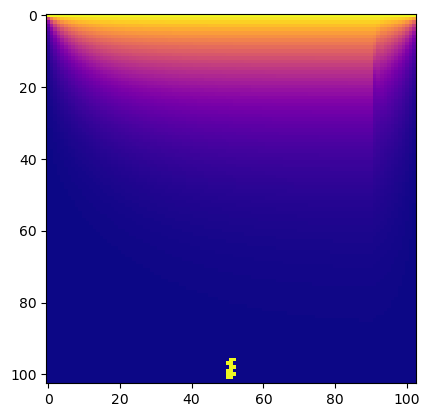

In [3]:
import matplotlib.pyplot as plt


N = 100
position = [100, 50]
w = 1.9
eta = 1
stop = 0.1


[C, cluster, n_count] = growth_model(N, position, w, eta, stop)

plt.imshow(merge(C, cluster, n_count),cmap='plasma')


In [2]:
run <diffusion_equation.py> 

Exception: File `'<diffusion_equation.py>'` not found.